# Importing dataset

In [1]:
import pandas as pd
df = pd.read_csv("project.csv")
df.head()

artist_familiarity  artist_hotttnesss           artist_id  artist_latitude  \
0            0.780462           0.574275  ARMQHX71187B9890D3              NaN   
1            0.581794           0.401998  ARD7TVE1187B99BFB1              NaN   
2            0.630630           0.417500  ARMJAGH1187FB546F3         35.14968   
3            0.487357           0.343428  ARKRRTF1187B9984DA              NaN   
4            0.630382           0.454231  AR7G5I41187FB4CE6C              NaN   

   artist_location  artist_longitude       artist_name   duration  \
0      Atlanta, GA               NaN          Mastodon  280.21506   
1  California - LA               NaN            Casual  218.93179   
2      Memphis, TN         -90.04892      The Box Tops  148.03546   
3              NaN               NaN  Sonora Santanera  177.47546   
4  London, England               NaN          Adam Ant  233.40363   

   end_of_fade_in  key  ...  mode_confidence  \
0           0.238    5  ...            0.500   
1           0.247    1  ...            0.636   
2           0.148    6  ...            0.430   
3           0.282    8  ...            0.565   
4           0.000    0  ...            0.749   

                               release  song_hotttnesss  start_of_fade_out  \
0                 Call of the Mastodon         0.597641            275.528   
1                          Fear Itself         0.602120            218.932   
2                           Dimensions              NaN            137.915   
3  Las Numero 1 De La Sonora Santanera              NaN            172.304   
4                        Friend Or Foe              NaN            217.124   

     tempo  time_signature  time_signature_confidence              title  \
0  173.205               5                      0.120  Deep Sea Creature   
1   92.198               4                      0.778   I Didn't Mean To   
2  121.274               4                      0.384          Soul Deep   
3  100.070               1                      0.000    Amor De Cabaret   
4  119.293               4                      0.000    Something Girls   

   year  bbhot  
0  2001      0  
1     0      0  
2  1969      1  
3     0      0  
4  1982      0  

[5 rows x 23 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   artist_familiarity         9997 non-null   float64
 1   artist_hotttnesss          10001 non-null  float64
 2   artist_id                  10001 non-null  object 
 3   artist_latitude            3742 non-null   float64
 4   artist_location            5709 non-null   object 
 5   artist_longitude           3742 non-null   float64
 6   artist_name                10001 non-null  object 
 7   duration                   10001 non-null  float64
 8   end_of_fade_in             10001 non-null  float64
 9   key                        10001 non-null  int64  
 10  key_confidence             10001 non-null  float64
 11  loudness                   10001 non-null  float64
 12  mode                       10001 non-null  int64  
 13  mode_confidence            10001 non-null  flo

# Data preprocessing

In [3]:
#removing features which do not affect the popularity of the song

drop_list = ['artist_id','artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss']
x = df.drop(drop_list, axis=1)

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   artist_familiarity         9997 non-null   float64
 1   artist_hotttnesss          10001 non-null  float64
 2   duration                   10001 non-null  float64
 3   end_of_fade_in             10001 non-null  float64
 4   key                        10001 non-null  int64  
 5   key_confidence             10001 non-null  float64
 6   loudness                   10001 non-null  float64
 7   mode                       10001 non-null  int64  
 8   mode_confidence            10001 non-null  float64
 9   start_of_fade_out          10001 non-null  float64
 10  tempo                      10001 non-null  float64
 11  time_signature             10001 non-null  int64  
 12  time_signature_confidence  10001 non-null  float64
 13  year                       10001 non-null  int

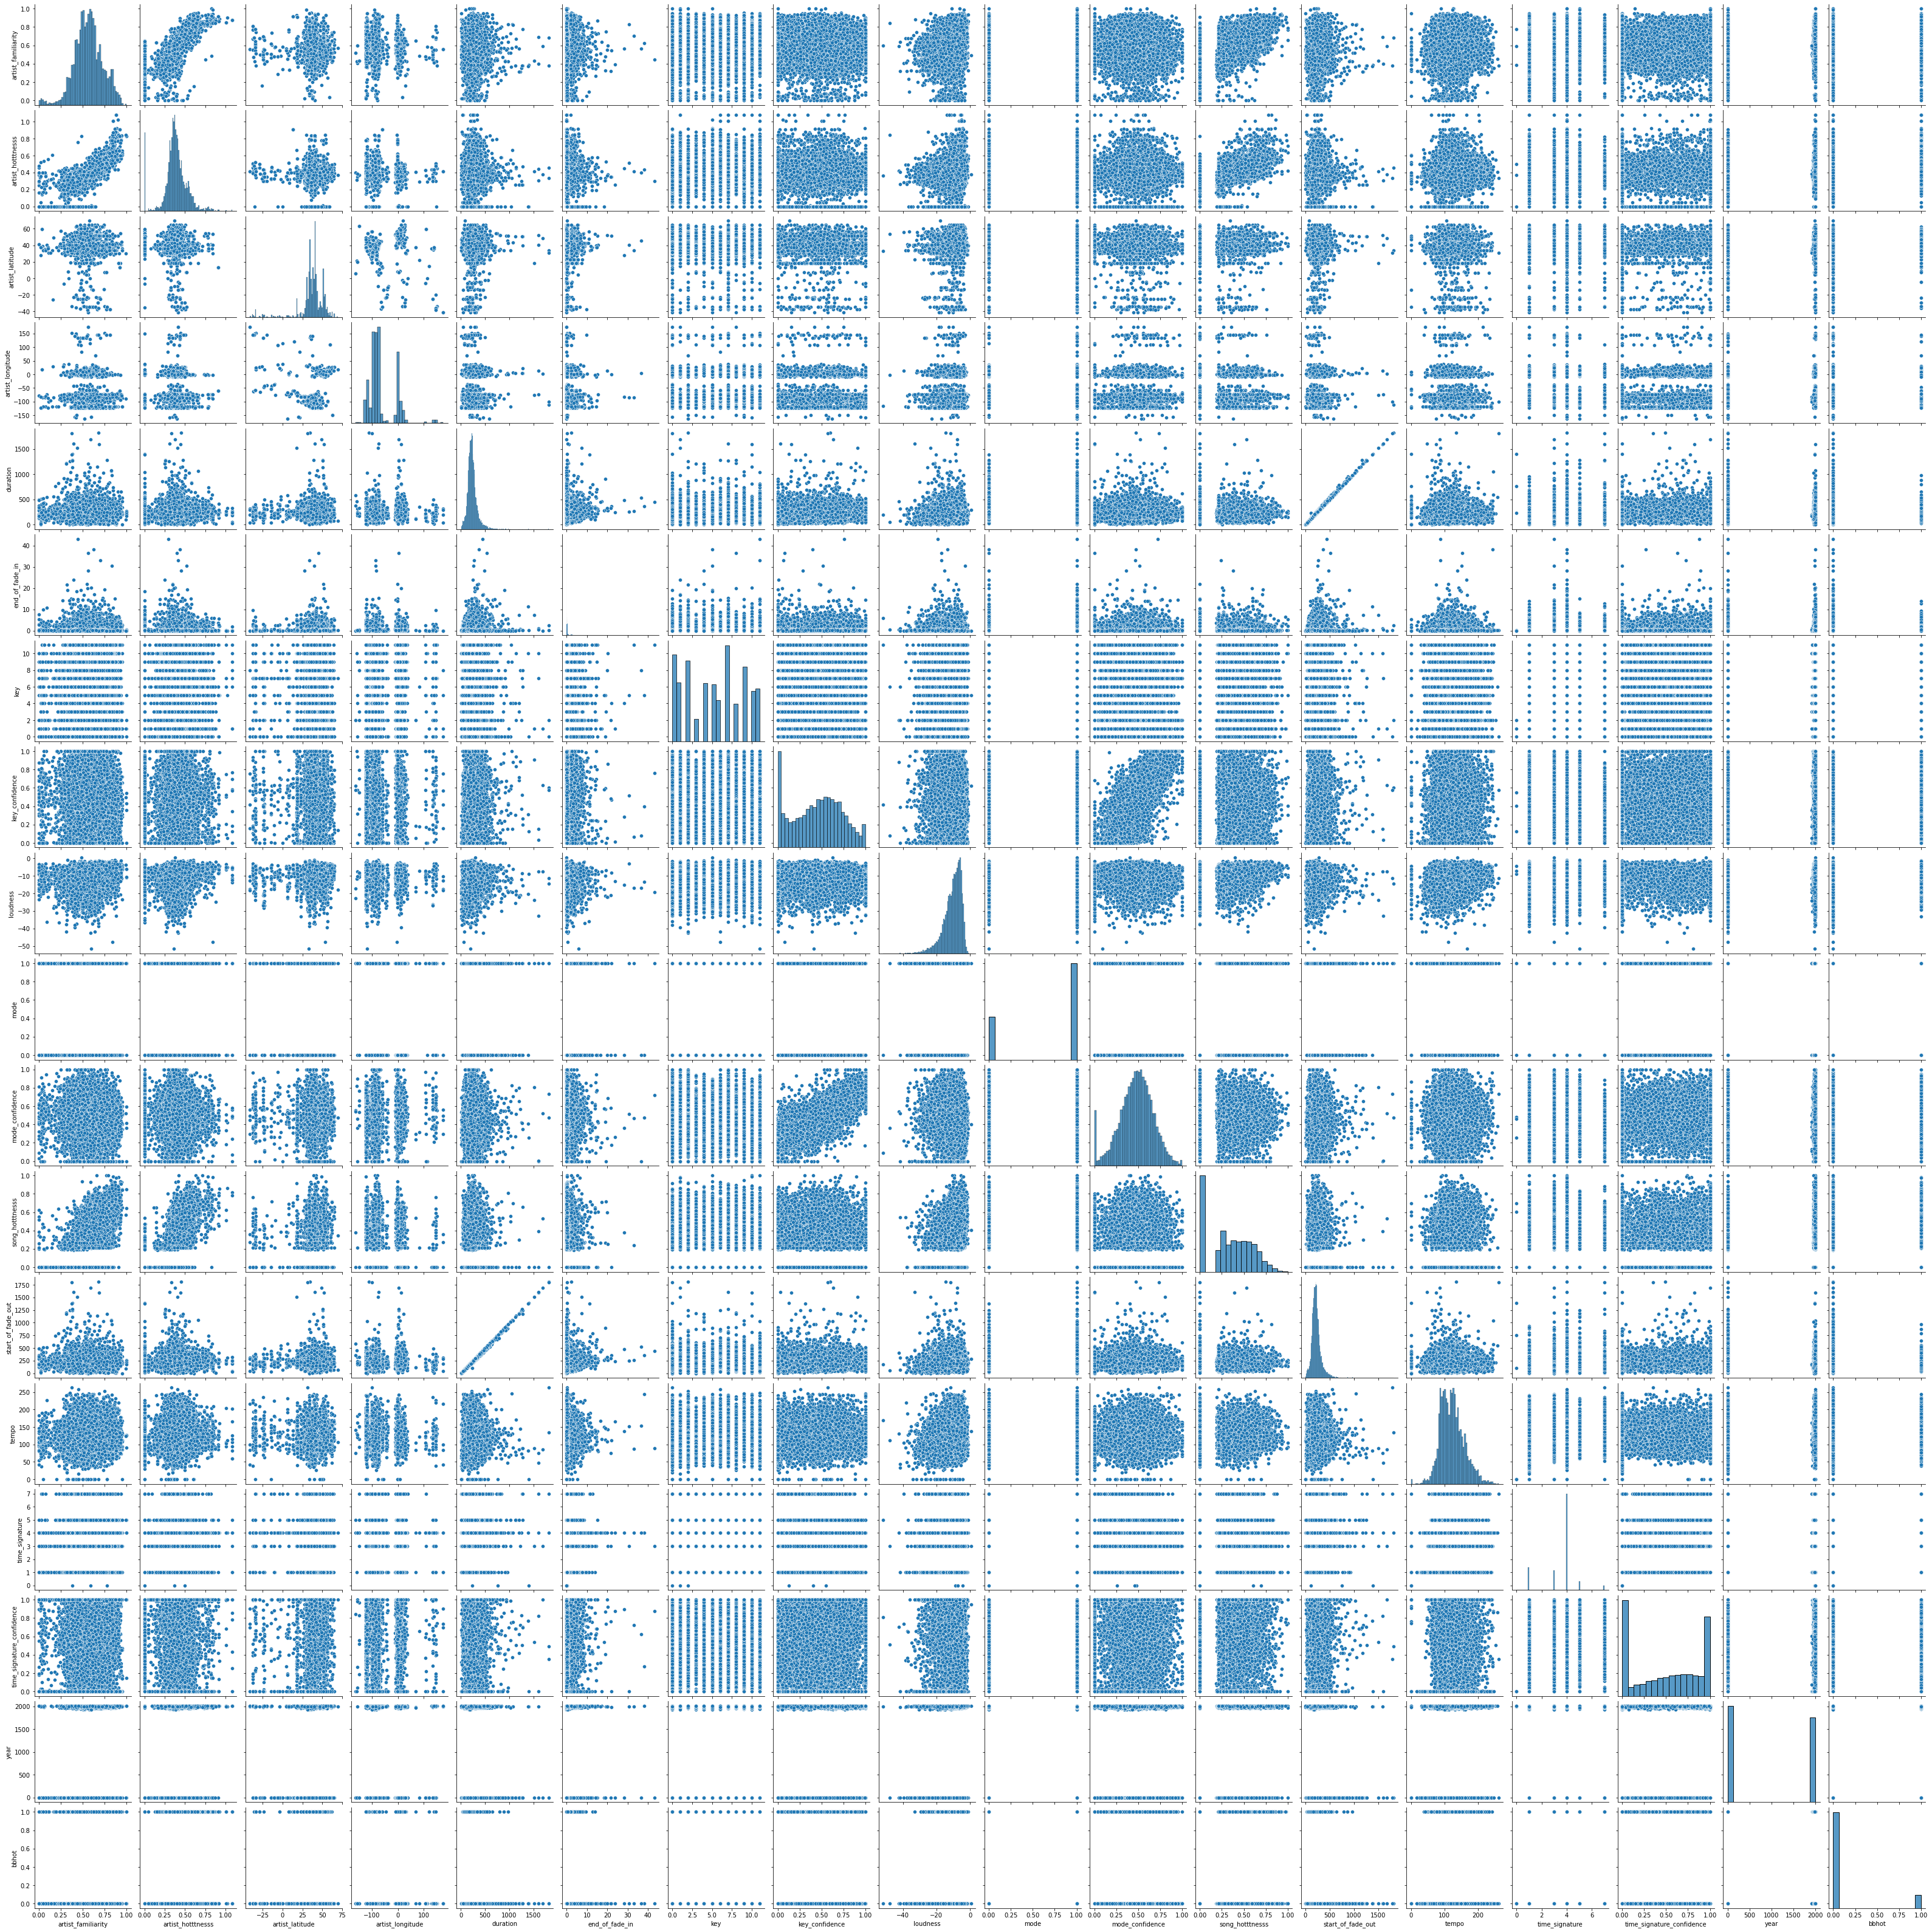

In [5]:
import seaborn as sns
sns.pairplot(df)

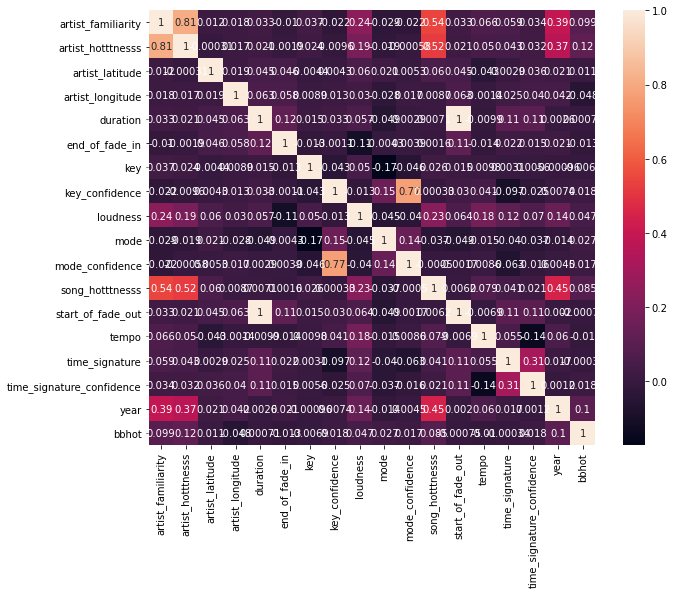

In [8]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [9]:
x.isnull().sum()

artist_familiarity           4
artist_hotttnesss            0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
year                         0
bbhot                        0
dtype: int64

In [10]:
#handling null values
x["artist_familiarity"] = x["artist_familiarity"].fillna(x["artist_familiarity"].median())

In [11]:
#dependent variable
y = df.bbhot

In [12]:
x = x.drop("bbhot", axis=1)

In [13]:
x.head()

artist_familiarity  artist_hotttnesss   duration  end_of_fade_in  key  \
0            0.780462           0.574275  280.21506           0.238    5   
1            0.581794           0.401998  218.93179           0.247    1   
2            0.630630           0.417500  148.03546           0.148    6   
3            0.487357           0.343428  177.47546           0.282    8   
4            0.630382           0.454231  233.40363           0.000    0   

   key_confidence  loudness  mode  mode_confidence  start_of_fade_out  \
0           0.555    -3.306     1            0.500            275.528   
1           0.736   -11.197     0            0.636            218.932   
2           0.169    -9.843     0            0.430            137.915   
3           0.643    -9.689     1            0.565            172.304   
4           0.751    -9.013     1            0.749            217.124   

     tempo  time_signature  time_signature_confidence  year  
0  173.205               5                      0.120  2001  
1   92.198               4                      0.778     0  
2  121.274               4                      0.384  1969  
3  100.070               1                      0.000     0  
4  119.293               4                      0.000  1982

In [14]:
print(y.shape)

(10001,)


In [15]:
x.shape

(10001, 14)

# Training, testing and splitting dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

# Modelling using logistic regression

In [17]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [18]:
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.31%


In [19]:
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

acc_log = testingModel(model, X_train, y_train)

Scores: [0.59338983 0.64002119 0.58137712 0.6107839  0.58869396 0.617787
 0.59370349 0.68754323 0.64576914 0.61294515]
Mean: 0.6172014005014865
Standard Deviation: 0.03091871684488421


# Modelling using Artificial Neural Network

In [20]:
#normalising the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6700, 14)
(3301, 14)


In [21]:
from keras import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(9, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 135       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

In [24]:
m = model.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/150
108/108 [==============================] - 4s 21ms/step - loss: 0.7437 - mse: 0.7437 - mae: 0.6339 - accuracy: 0.8801 - val_loss: 0.1293 - val_mse: 0.1293 - val_mae: 0.1771 - val_accuracy: 0.8843
Epoch 2/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1672 - mse: 0.1672 - mae: 0.2326 - accuracy: 0.8822 - val_loss: 0.1056 - val_mse: 0.1056 - val_mae: 0.1741 - val_accuracy: 0.8843
Epoch 3/150
108/108 [==============================] - 0s 4ms/step - loss: 0.1351 - mse: 0.1351 - mae: 0.2094 - accuracy: 0.8718 - val_loss: 0.1024 - val_mse: 0.1024 - val_mae: 0.2000 - val_accuracy: 0.8843
Epoch 4/150
108/108 [==============================] - 0s 4ms/step - loss: 0.1181 - mse: 0.1181 - mae: 0.2128 - accuracy: 0.8769 - val_loss: 0.1024 - val_mse: 0.1024 - val_mae: 0.2150 - val_accuracy: 0.8843
Epoch 5/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1122 - mse: 0.1122 - mae: 0.2159 - accuracy: 0.8792 - val_loss: 0.1026 - val_mse: 0.1026 - val

108/108 [==============================] - 0s 3ms/step - loss: 0.1091 - mse: 0.1091 - mae: 0.2169 - accuracy: 0.8727 - val_loss: 0.1019 - val_mse: 0.1019 - val_mae: 0.2127 - val_accuracy: 0.8843
Epoch 80/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1066 - mse: 0.1066 - mae: 0.2129 - accuracy: 0.8773 - val_loss: 0.1019 - val_mse: 0.1019 - val_mae: 0.2155 - val_accuracy: 0.8843
Epoch 81/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1015 - mse: 0.1015 - mae: 0.2075 - accuracy: 0.8836 - val_loss: 0.1017 - val_mse: 0.1017 - val_mae: 0.2126 - val_accuracy: 0.8843
Epoch 82/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1025 - mse: 0.1025 - mae: 0.2081 - accuracy: 0.8818 - val_loss: 0.1018 - val_mse: 0.1018 - val_mae: 0.2162 - val_accuracy: 0.8843
Epoch 83/150
108/108 [==============================] - 0s 3ms/step - loss: 0.1048 - mse: 0.1048 - mae: 0.2132 - accuracy: 0.8789 - val_loss: 0.1016 - val_mse: 0.1016 - val_mae: 0.2

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy'])


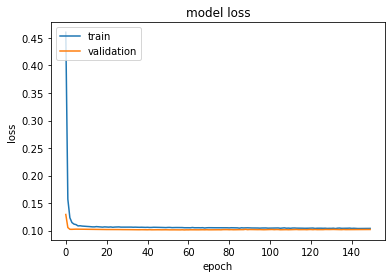

In [25]:
import matplotlib.pyplot as plt
print(m.history.keys())
# "Loss"
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("Accuracy score : ",accuracy_score(y_test,y_pred))

MAE :  0.11693426234474402
Accuracy score :  0.883065737655256
